# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Adrian Putra Ramadhan
- Email: adrianramadhan881@gmail.com

# Menentukan Pertanyaan Bisnis
- Apakah ada perbedaan yang signifikan dalam jumlah penyewaan sepeda pada hari kerja dan hari libur? Berapa besar perbedaannya?
- Apakah ada perbedaan yang signifikan dalam jumlah penyewaan sepeda pada jam kerja dan jam non-kerja? Berapa besar perbedaannya?
- Kapan waktu puncak penyewaan sepeda dalam sehari dan waktu terendah penjualan dalam sehari?
- Bagaimana perbandingan jumlah penyewaan sepeda antara pengguna terdaftar dan kasual?

In [20]:
# Memanggil library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling
## Gathering Data

In [22]:
# Memuat dataset day
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [24]:
# Memuat dataset hour
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Assessing Data
### Day Dataset

In [28]:
# Menampilkan informasi dasar tentang Day Dataset
print("\nDay Dataset - Info:")
print(day_df.info())


Day Dataset - Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [30]:
# Tampilkan Ringkasan Statistik Dataset Day
print("\nDay Dataset - Summary Statistics:")
print(day_df.describe())


Day Dataset - Summary Statistics:
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.19

In [32]:
# Cek untuk missing values di Dataset Day
print("\nDay Dataset - Missing Values:")
print(day_df.isnull().sum())


Day Dataset - Missing Values:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [34]:
# Cek untuk duplikasi data di Dataset Day
print("\nDay Dataset - Duplicates:")
print(day_df.duplicated().sum())


Day Dataset - Duplicates:
0


## Hour Dataset

In [38]:
# Menampilkan informasi dasar Dataset Hour
print("\nHour Dataset - Info:")
print(hour_df.info())


Hour Dataset - Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


In [42]:
# Menampilkan ringkasan statistik Dataset Hour
print("\nHour Dataset - Summary Statistics:")
print(hour_df.describe())


Hour Dataset - Summary Statistics:
          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771

In [48]:
# Cek Missing value
print("\nHour Dataset - Missing Values:")
print(hour_df.isnull().sum())


Hour Dataset - Missing Values:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [50]:
# Cek Duplikat
print("\nHour Dataset - Duplicates:")
print(hour_df.duplicated().sum())


Hour Dataset - Duplicates:
0


## Cleaning Data
Dalam proses ini, kita akan melakukan beberapa langkah untuk membersihkan dan memformat data. Berikut adalah langkah-langkah yang akan diambil:

- Menghapus Kolom yang Tidak Diperlukan
Kita akan menghapus kolom instant dan workingday. Kolom workingday sudah diwakili oleh kolom weekday, sedangkan kolom instant tidak relevan dengan analisis yang akan dilakukan.

In [54]:
hour_df.drop(['workingday'], axis=1, inplace=True)
day_df.drop(['workingday'], axis=1, inplace=True)

- Mengubah Tipe Data
Kita akan mengubah tipe data dari int menjadi category untuk kolom-kolom berikut: season, mnth, holiday, weekday, dan weathersit. Ini karena kolom-kolom tersebut memiliki nilai dapat dikelompokkan.

In [58]:
columns = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']
for column in columns:
    day_df[column] = day_df[column].astype("category")
    hour_df[column] = hour_df[column].astype("category")

In [60]:
# Konversi dteday daru object menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

- Mengganti Nama Kolom
Untuk meningkatkan keterbacaan, kita akan mengganti nama beberapa kolom di dataset day_df dan hour_df.

In [63]:
# Mengganti nama kolom di day_df
day_df.rename(columns={
    'yr': 'year',
    'mnth': 'month',
    'weekday': 'one_of_week',
    'weathersit': 'weather_situation',
    'windspeed': 'wind_speed',
    'cnt': 'count_cr',
    'hum': 'humidity'
}, inplace=True)

# Mengganti nama kolom di hour_df
hour_df.rename(columns={
    'yr': 'year',
    'hr': 'hours',
    'mnth': 'month',
    'weekday': 'one_of_week',
    'weathersit': 'weather_situation',
    'windspeed': 'wind_speed',
    'cnt': 'count_cr',
    'hum': 'humidity'
}, inplace=True)

- Mengonversi Nilai Kolom Kita akan mengonversi nilai dalam kolom agar lebih mudah dipahami
- season: 1:Spring, 2:Summer, 3:Fall, 4:Winter
- month: 1:Jan, 2:Feb, ..., 12:Dec
- weather_situation: 1:Clear, 2:Misty, 3:Light_RainSnow, 4:Heavy_RainSnow
- one_of_week: 0:Sun, 1:Mon, ..., 6:Sat
- year: 0:2011, 1:2012

In [66]:
# Konversi season
day_df.season.replace((1, 2, 3, 4), ('Spring', 'Summer', 'Fall', 'Winter'), inplace=True)
hour_df.season.replace((1, 2, 3, 4), ('Spring', 'Summer', 'Fall', 'Winter'), inplace=True)

# Konversi month
day_df.month.replace((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), 
                     ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'), inplace=True)
hour_df.month.replace((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), 
                      ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'), inplace=True)

# Konversi weather_situation
day_df.weather_situation.replace((1, 2, 3, 4), ('Clear', 'Misty', 'Light_rainsnow', 'Heavy_rainsnow'), inplace=True)
hour_df.weather_situation.replace((1, 2, 3, 4), ('Clear', 'Misty', 'Light_rainsnow', 'Heavy_rainsnow'), inplace=True)

# Konversi one_of_week
day_df.one_of_week.replace((0, 1, 2, 3, 4, 5, 6), 
                            ('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'), inplace=True)
hour_df.one_of_week.replace((0, 1, 2, 3, 4, 5, 6), 
                             ('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'), inplace=True)

# Konversi year
day_df.year.replace((0, 1), ('2011', '2012'), inplace=True)
hour_df.year.replace((0, 1), ('2011', '2012'), inplace=True)


C:\Users\asus\AppData\Local\Temp\ipykernel_3196\3841541564.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.season.replace((1, 2, 3, 4), ('Spring', 'Summer', 'Fall', 'Winter'), inplace=True)
C:\Users\asus\AppData\Local\Temp\ipykernel_3196\3841541564.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_d

- Menghitung Humidity
Kita akan mengalikan nilai humidity dengan 100 untuk mendapatkan persentase.

In [69]:
day_df['humidity'] = day_df['humidity'] * 100
hour_df['humidity'] = hour_df['humidity'] * 100

- Menambahkan Kolom Kategori Hari
Kita akan membuat kolom baru bernama category_days yang menunjukkan apakah hari tersebut adalah weekend atau weekdays.

In [74]:
def get_category_days(one_of_week):
    if one_of_week in ["Saturday", "Sunday"]:
        return "weekend"
    else: 
        return "weekdays"

hour_df["category_days"] = hour_df["one_of_week"].apply(get_category_days)
day_df["category_days"] = day_df["one_of_week"].apply(get_category_days)

- Kategori Kelembapan
Kita juga akan menambahkan kolom humidity_category untuk mengklasifikasikan kelembapan.

In [77]:
def classify_humidity(humidity):
    if humidity < 45:
        return "Terlalu kering"
    elif 45 <= humidity < 65:
        return "Ideal"
    else:
        return "Terlalu Lembab"

hour_df["humidity_category"] = hour_df["humidity"].apply(classify_humidity)
day_df["humidity_category"] = day_df["humidity"].apply(classify_humidity)

### Setelah melakukan langkah-langkah di atas, kita telah berhasil:

- Menghapus kolom instant dan workingday.
- Mengubah tipe data kolom dteday menjadi datetime.
- Mengonversi tipe data int pada kolom season, mnth, holiday, weekday, dan weathersit menjadi category.
- Mengganti nama kolom agar lebih mudah dibaca.
- Mengonversi isi kolom agar lebih mudah dipahami.
- Membuat kolom baru category_days yang menunjukkan apakah hari tersebut adalah weekend atau weekdays.

# Exploratory Data Analysis (EDA)

In [85]:
# Deskriptif statistik untuk day_df
day_df.describe(include="all")

,instant,dteday,season,year,month,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category
count,731.000000,731,731,731,731,731.0,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731
unique,NaN,NaN,4,2,12,2.0,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Fall,2012,Jan,0.0,Sunday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Ideal
freq,NaN,NaN,188,366,62,710.0,105,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521,334
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,62.789406,0.190486,848.176471,3656.172367,4504.348837,NaN,NaN
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN,NaN
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,52.000000,0.134950,315.500000,2497.000000,3152.000000,NaN,NaN
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,62.666700,0.180975,713.000000,3662.000000,4548.000000,NaN,NaN
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,73.020850,0.233214,1096.000000,4776.500000,5956.000000,NaN,NaN
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,97.250000,0.507463,3410.000000,6946.000000,8714.000000,NaN,NaN


### Dari analisis deskriptif ini, kita dapat menyimpulkan bahwa:
- Terdapat 731 entri dalam dataset, yang mencakup data harian selama dua tahun (2011-2012)
- Rata-rata penyewaan sepeda menunjukkan bahwa pengguna terdaftar cenderung menyewa lebih banyak dibandingkan pengguna kasual

In [88]:
# Deskriptif statistik untuk hour_df
hour_df.describe(include="all")

,instant,dteday,season,year,month,hours,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.0,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379
unique,NaN,NaN,4,2,12,NaN,2.0,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Fall,2012,May,NaN,0.0,Saturday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Terlalu Lembab
freq,NaN,NaN,4496,8734,1488,NaN,16879.0,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12365,8356
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,62.722884,0.190098,35.676218,153.786869,189.463088,NaN,NaN
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,48.000000,0.104500,4.000000,34.000000,40.000000,NaN,NaN
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,0.500000,0.484800,63.000000,0.194000,17.000000,115.000000,142.000000,NaN,NaN
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,0.660000,0.621200,78.000000,0.253700,48.000000,220.000000,281.000000,NaN,NaN
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,1.000000,1.000000,100.000000,0.850700,367.000000,886.000000,977.000000,NaN,NaN


## Dari analisis deskriptif ini, kita dapat menyimpulkan bahwa:
- Terdapat 17,379 entri dalam dataset, yang mencakup data penyewaan sepeda per jam selama dua tahun (2011-2012)
- Dataset hour_df memberikan informasi yang lebih rinci tentang penyewaan sepeda per jam dibandingkan dengan dataset day_df.

## Explanatory Data Analysis & Visualization
- Apakah ada perbedaan yang signifikan dalam jumlah penyewaan sepeda pada hari kerja dan hari libur? Berapa besar perbedaannya?
- Apakah ada perbedaan yang signifikan dalam jumlah penyewaan sepeda pada jam kerja dan jam non-kerja? Berapa besar perbedaannya?
- Kapan waktu puncak penyewaan sepeda dalam sehari dan waktu terendah penjualan dalam sehari?
- Bagaimana perbandingan jumlah penyewaan sepeda antara pengguna terdaftar dan kasual?

In [98]:
# Apakah ada perbedaan yang signifikan dalam jumlah penyewaan sepeda pada hari kerja dan hari libur? Berapa besar perbedaannya?
# Menghitung jumlah penyewaan berdasarkan kategori hari
rental_by_day_type = day_df.groupby('category_days')['count_cr'].sum().reset_index()

C:\Users\asus\AppData\Local\Temp\ipykernel_3196\3252890726.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category_days', y='count_cr', data=rental_by_day_type, palette='viridis')


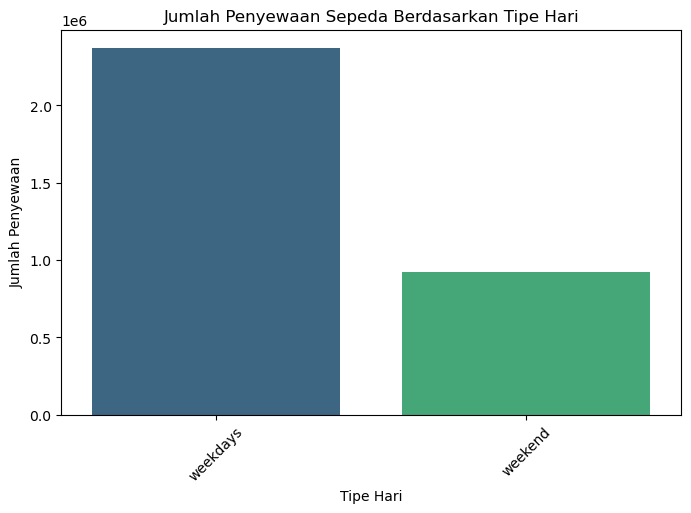

In [100]:
# Visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(x='category_days', y='count_cr', data=rental_by_day_type, palette='viridis')
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Tipe Hari')
plt.xlabel('Tipe Hari')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=45)
plt.show()

In [104]:
# Menghitung perbedaan
weekday_rentals = rental_by_day_type[rental_by_day_type['category_days'] == 'weekdays']['count_cr'].values[0]
weekend_rentals = rental_by_day_type[rental_by_day_type['category_days'] == 'weekend']['count_cr'].values[0]
difference = weekday_rentals - weekend_rentals

print(f'Jumlah penyewaan pada hari kerja: {weekday_rentals}')
print(f'Jumlah penyewaan pada hari libur: {weekend_rentals}')
print(f'Perbedaan jumlah penyewaan: {difference}')

Jumlah penyewaan pada hari kerja: 2370845
Jumlah penyewaan pada hari libur: 921834
Perbedaan jumlah penyewaan: 1449011


### Kesimpulan Visualiasi diatas
- Terdapat perbedaan yang signifikan dalam jumlah penyewaan sepeda antara hari kerja dan akhir pekan, dengan hari kerja menunjukkan angka penyewaan yang jauh lebih tinggi.
- Hal ini dapat mengindikasikan bahwa penyewaan sepeda lebih banyak digunakan untuk keperluan transportasi sehari-hari pada hari kerja, sementara pada akhir pekan, penggunaan sepeda mungkin lebih bersifat rekreasi atau tidak sebanyak pada hari kerja.

In [110]:
# Apakah ada perbedaan yang signifikan dalam jumlah penyewaan sepeda pada jam kerja dan jam non-kerja?
# Menentukan jam kerja (misalnya, 9 AM - 5 PM)
hour_df['work_hours'] = hour_df['hours'].apply(lambda x: 'Work Hours' if 9 <= x <= 17 else 'Non-Work Hours')

In [112]:
# Menghitung jumlah penyewaan berdasarkan jam kerja
rental_by_work_hours = hour_df.groupby('work_hours')['count_cr'].sum().reset_index()

C:\Users\asus\AppData\Local\Temp\ipykernel_3196\21799624.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='work_hours', y='count_cr', data=rental_by_work_hours, palette='coolwarm')


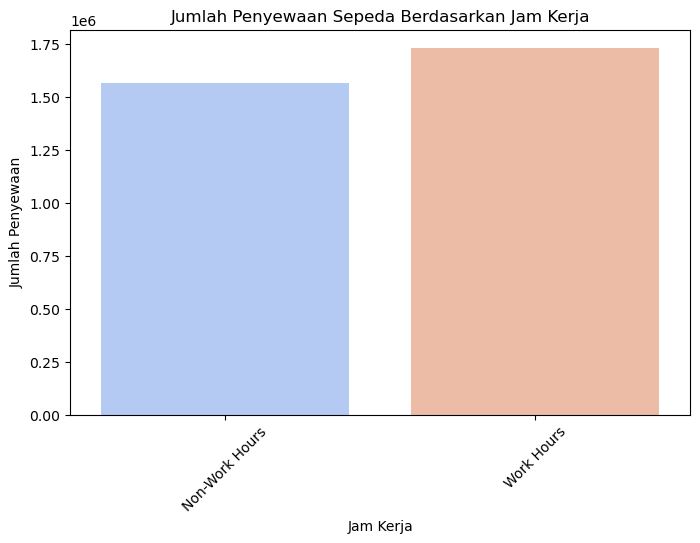

In [114]:
# Visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(x='work_hours', y='count_cr', data=rental_by_work_hours, palette='coolwarm')
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Jam Kerja')
plt.xlabel('Jam Kerja')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=45)
plt.show()

In [116]:
# Menghitung perbedaan
work_hours_rentals = rental_by_work_hours[rental_by_work_hours['work_hours'] == 'Work Hours']['count_cr'].values[0]
non_work_hours_rentals = rental_by_work_hours[rental_by_work_hours['work_hours'] == 'Non-Work Hours']['count_cr'].values[0]
difference_work_hours = work_hours_rentals - non_work_hours_rentals

print(f'Jumlah penyewaan pada jam kerja: {work_hours_rentals}')
print(f'Jumlah penyewaan pada jam non-kerja: {non_work_hours_rentals}')
print(f'Perbedaan jumlah penyewaan: {difference_work_hours}')

Jumlah penyewaan pada jam kerja: 1729757
Jumlah penyewaan pada jam non-kerja: 1562922
Perbedaan jumlah penyewaan: 166835


### Kesimpulan Visualisasi Diatas
- Visualisasi di atas menunjukkan jumlah penyewaan sepeda berdasarkan jam kerja, yang dibagi menjadi Work Hours (jam kerja) dan Non-Work Hours (jam non-kerja).
- Visualisasi ini mengindikasikan bahwa sepeda lebih banyak disewa selama jam kerja, yang mungkin mencerminkan kebutuhan transportasi yang lebih tinggi pada waktu tersebut. Hal ini dapat menjadi informasi penting bagi penyedia layanan penyewaan sepeda untuk merencanakan ketersediaan sepeda dan strategi pemasaran.

In [135]:
# Kapan waktu puncak penyewaan sepeda dalam sehari dan waktu terendah penjualan dalam sehari?
# Menghitung jumlah penyewaan per jam
hourly_rentals = hour_df.groupby('hours')['count_cr'].sum().reset_index()

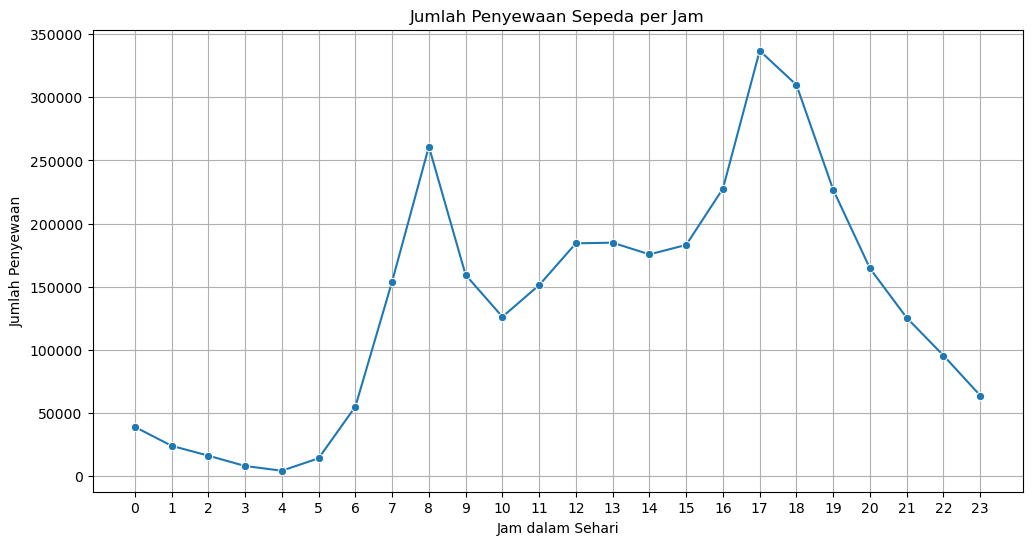

In [137]:
# Visualisasi jumlah penyewaan per jam
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_rentals, x='hours', y='count_cr', marker='o')
plt.title('Jumlah Penyewaan Sepeda per Jam')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(range(0, 24))  # Menampilkan jam dari 0 hingga 23
plt.grid()
plt.show()

### Kesimpulan Visualisasi Diatas
- Puncak Tertinggi: Terlihat bahwa waktu puncak penyewaan terjadi sekitar jam 8 pagi dan jam 5 sore, dengan jumlah penyewaan mencapai lebih dari 300,000 pada jam 8 dan sekitar 250,000 pada jam 17. Ini menunjukkan bahwa banyak pengguna menyewa sepeda untuk keperluan transportasi di pagi hari menuju tempat kerja dan di sore hari saat pulang.
- Waktu Rendah Penyewaan: Jam Malam dan Dini Hari, Jumlah penyewaan sangat rendah pada jam-jam awal pagi (0-5) dan juga menurun signifikan setelah jam 20. Ini menunjukkan bahwa penyewaan sepeda cenderung tidak populer pada malam hari.


In [151]:
# Bagaimana perbandingan jumlah penyewaan sepeda antara pengguna terdaftar dan kasual?
# Data penyewaan
labels = ['Registered', 'Casual']
sizes = [day_df['registered'].sum(), day_df['casual'].sum()]
colors = ['#1f77b4', '#ff7f0e']
explode = (0.1, 0)  # Hightlight the registered segment

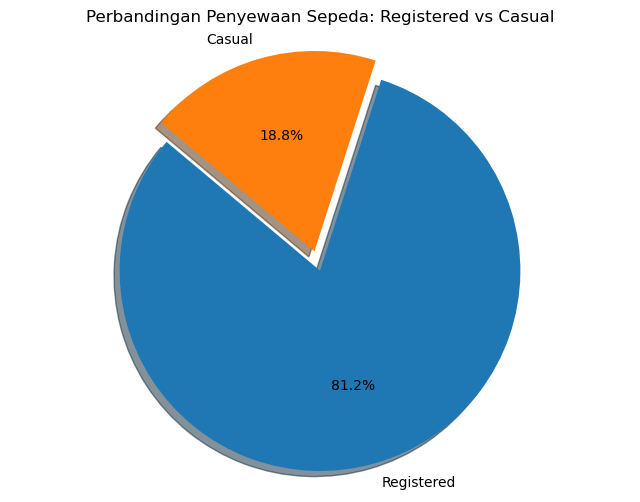

In [153]:
# Membuat pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Perbandingan Penyewaan Sepeda: Registered vs Casual')
plt.show()

### Kesimpulan Visualiasi diatas
- Pie chart ini dengan jelas menggambarkan dominasi pengguna terdaftar dalam penyewaan sepeda. Hal ini dapat mengindikasikan bahwa pengguna terdaftar mungkin lebih loyal atau lebih sering menggunakan layanan penyewaan sepeda dibandingkan dengan pengguna kasual.

## Conclusion
1. Apakah ada perbedaan yang signifikan dalam jumlah penyewaan sepeda pada hari kerja dan hari libur? Berapa besar perbedaannya?
2. Apakah ada perbedaan yang signifikan dalam jumlah penyewaan sepeda pada jam kerja dan jam non-kerja? Berapa besar perbedaannya?
3. Kapan waktu puncak penyewaan sepeda dalam sehari dan waktu terendah penjualan dalam sehari?
4. Bagaimana perbandingan jumlah penyewaan sepeda antara pengguna terdaftar dan kasual?

- Perbedaan Penyewaan pada Hari Kerja dan Hari Libur: Terdapat perbedaan signifikan dalam jumlah penyewaan sepeda, dengan jumlah penyewaan pada hari kerja jauh lebih tinggi dibandingkan hari libur. Jumlah penyewaan pada hari kerja mencapai lebih dari 2 juta, sedangkan pada hari libur hanya sekitar 0.5 juta.

- Perbedaan Penyewaan pada Jam Kerja dan Jam Non-Kerja: Penyewaan sepeda pada jam kerja juga lebih tinggi dibandingkan jam non-kerja. dengan total penyewaan mencapai sekitar 1.7 juta pada jam kerja dan 1.5 juta pada jam non-kerja, menunjukkan perbedaan yang signifikan.

- Waktu Puncak dan Terendah Penyewaan: Waktu puncak penyewaan sepeda terjadi sekitar jam 8 pagi dan 5 sore, dengan jumlah penyewaan mencapai lebih dari 300,000. Sebaliknya, waktu terendah penyewaan terjadi pada dini hari (jam 0-5), dengan jumlah penyewaan yang sangat rendah.

- Perbandingan Penyewaan antara Pengguna Terdaftar dan Kasual: Pengguna terdaftar menyewa sepeda jauh lebih banyak dibandingkan pengguna kasual, dengan proporsi sekitar 81.2% untuk pengguna terdaftar dan 18.8% untuk pengguna kasual, menunjukkan bahwa pengguna terdaftar lebih aktif dalam penyewaan sepeda.

# Menerapkan teknik analisis lanjutan

## 1. Clustering
### Total Pengguna Berdasarkan Jam Penyewaan dan Kategori Hari

In [191]:
# Menambahkan kolom kategori hari
hour_df['category_days'] = hour_df['one_of_week'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

# Menghitung total penyewaan berdasarkan jam dan kategori hari
total_pengguna_jam_hari = hour_df.groupby(['hours', 'category_days']).count_cr.sum().unstack()

# Menampilkan hasil
total_pengguna_jam_hari

category_days,Weekday,Weekend
hours,,
0,19453,19677
1,8994,15170
2,4764,11588
3,2532,5642
4,2669,1759
5,12555,1706
6,51434,3698
7,145869,8302
8,240176,20825


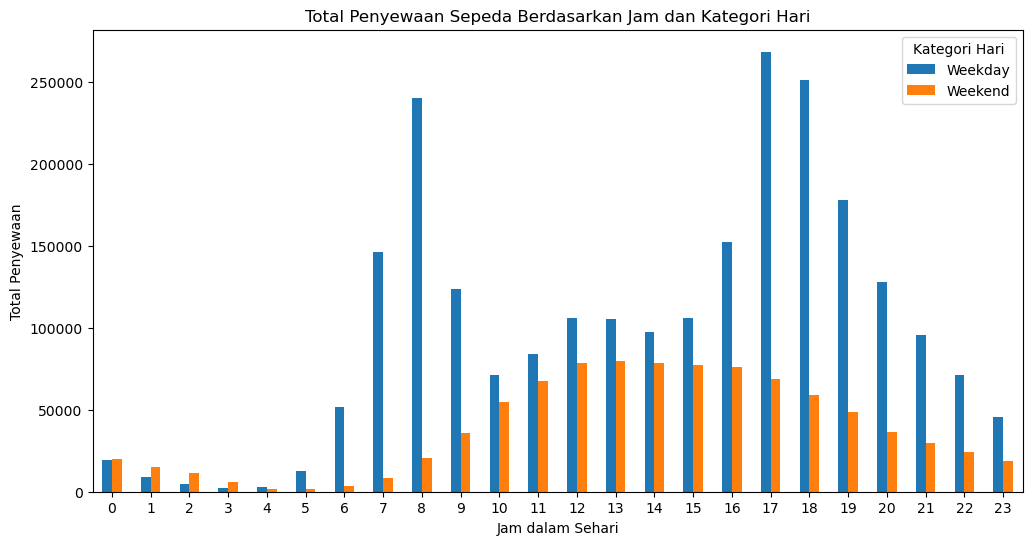

In [193]:
# Visualisasi
total_pengguna_jam_hari.plot(kind='bar', figsize=(12, 6))
plt.title('Total Penyewaan Sepeda Berdasarkan Jam dan Kategori Hari')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Total Penyewaan')
plt.xticks(rotation=0)
plt.legend(title='Kategori Hari')
plt.show()

## 2. RFM Analysis

### RFM Analysis adalah teknik yang digunakan untuk memahami perilaku pelanggan berdasarkan tiga faktor utama:

- Recency (R): Seberapa baru pelanggan berinteraksi dengan bisnis. Semakin baru interaksi, semakin tinggi nilai R.
- Frequency (F): Seberapa sering pelanggan berinteraksi dengan bisnis. Semakin sering, semakin tinggi nilai F.
- Monetary (M): Seberapa banyak uang yang dibelanjakan oleh pelanggan. Semakin banyak, semakin tinggi nilai M.

In [212]:
# Menghitung tanggal terakhir
last_date = hour_df['dteday'].max()

# Menghitung RFM
rfm_df = hour_df.groupby('registered').agg({
    'dteday': lambda x: (last_date - x.max()).days,  # Recency
    'count_cr': 'count',  # Frequency
    'casual': 'sum'  # Monetary (as an example, assuming casual represents monetary value)
}).reset_index()

# Mengganti nama kolom
rfm_df.columns = ['user_id', 'Recency', 'Frequency', 'Monetary']

# Menampilkan hasil RFM
print(rfm_df.head())

   user_id  Recency  Frequency  Monetary
0        0       38         24        35
1        1        0        201        93
2        2        1        245       158
3        3        0        294       272
4        4        3        307       374


In [214]:
day_df.to_csv("./dashboard/day_clean.csv", index=False)

In [216]:
hour_df.to_csv("./dashboard/hour_clean.csv", index=False)